#Sprint 1- Using Predefined Models

##Import Necessory Libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score,confusion_matrix

##Load the dataset

In [105]:
#Dataset Reading
dataset=pd.read_csv('cardio_train.csv',sep=';')
dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [106]:
dataset.shape

(70000, 13)

In [107]:
#Dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [108]:
dataset.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [109]:
#Check null values
dataset.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [110]:
#Check Duplicate Values
dataset.duplicated().sum()

0

In [111]:
#convert ages from days to years
dataset["age"]=(dataset["age"]/365).values.astype(int)
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [112]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
dataset['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [114]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset
# Replace 'categorical_vars' with the list of categorical variables in your dataset

categorical_vars = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Loop through each categorical variable and display its unique values
for var in categorical_vars:
    unique_values = dataset[var].unique()
    print(f"Unique values for {var}: {unique_values}")


Unique values for gender: [2 1]
Unique values for cholesterol: [1 3 2]
Unique values for gluc: [1 2 3]
Unique values for smoke: [0 1]
Unique values for alco: [0 1]
Unique values for active: [1 0]


In [115]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset
# Replace 'class_label' with the name of your target variable

class_label = 'cardio'

# Display unique values of the class label
unique_values = dataset[class_label].unique()
print(f"Unique values for {class_label}: {unique_values}")


Unique values for cardio: [0 1]


##Visualization

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>,
        <Axes: title={'center': 'cholesterol'}>],
       [<Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>,
        <Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>],
       [<Axes: title={'center': 'cardio'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

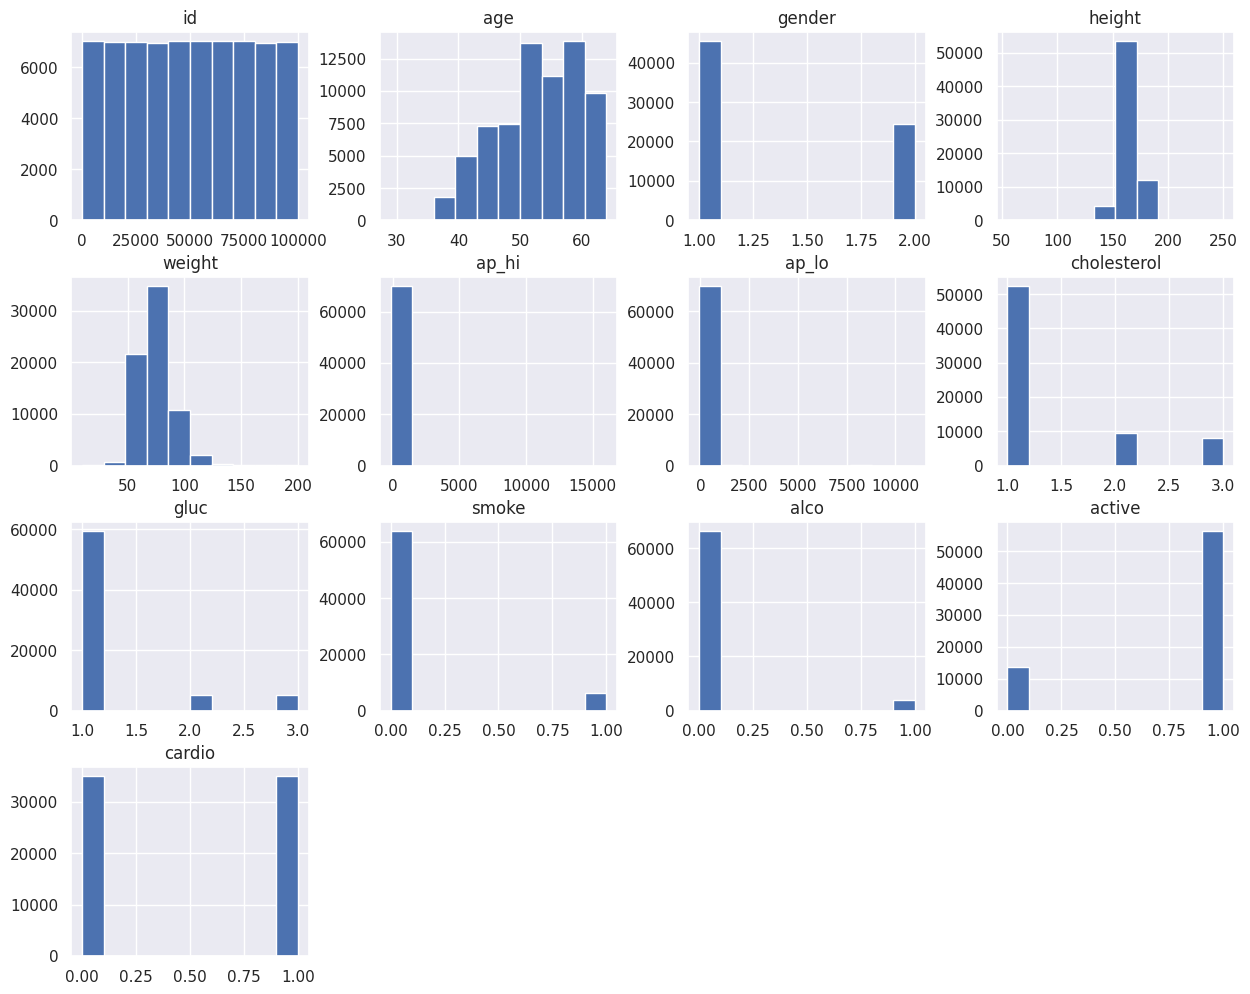

In [116]:
dataset.hist(figsize=(15,12))

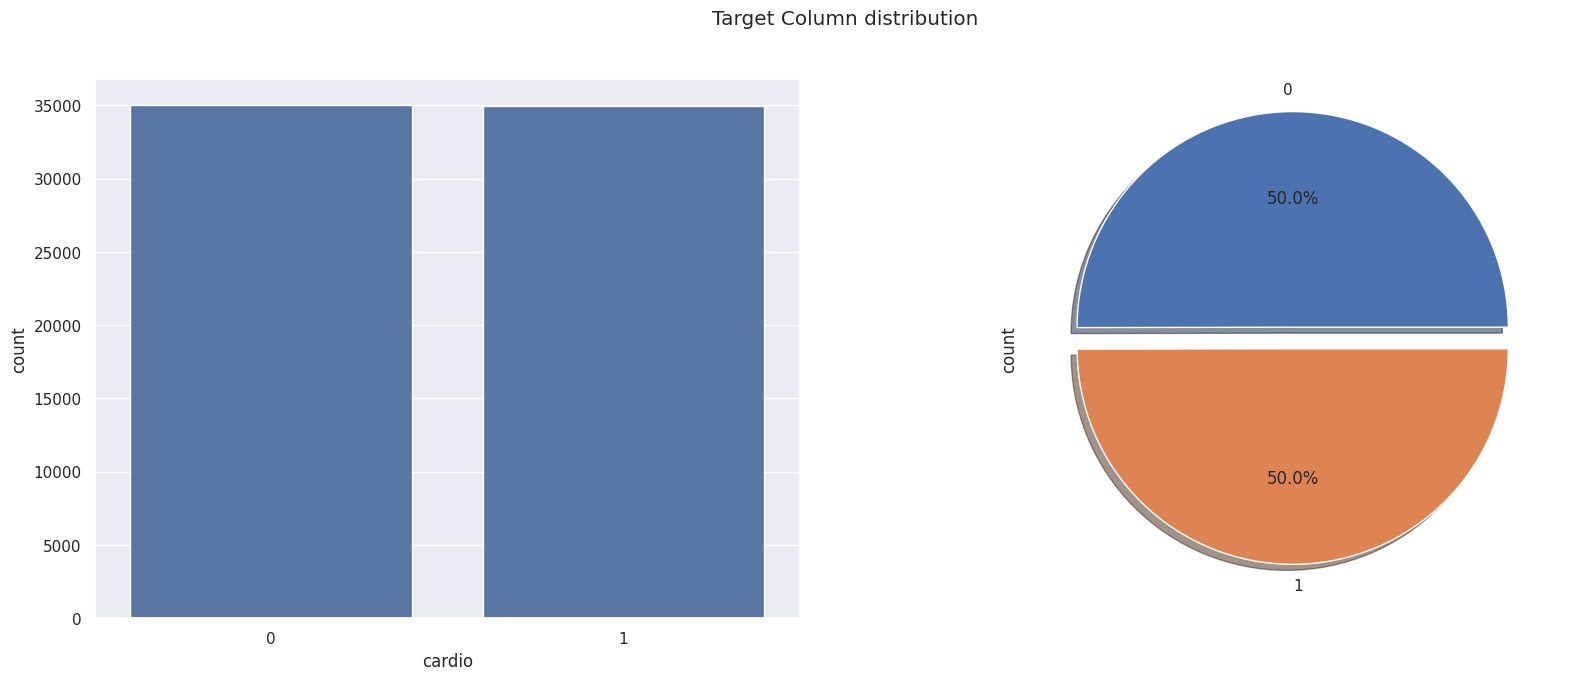

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=dataset, x="cardio", ax=ax[0])
dataset["cardio"].value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%", labels=["0", "1"], shadow=True, ax=ax[1])
fig.suptitle("Target Column distribution")

plt.show()

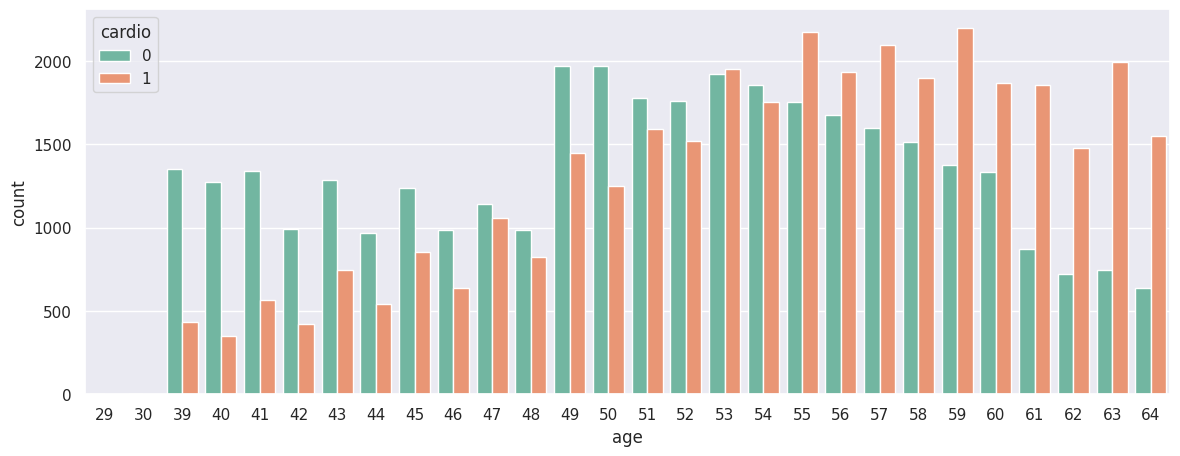

In [118]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 5
sns.countplot(x='age', hue='cardio', data = dataset, palette="Set2");

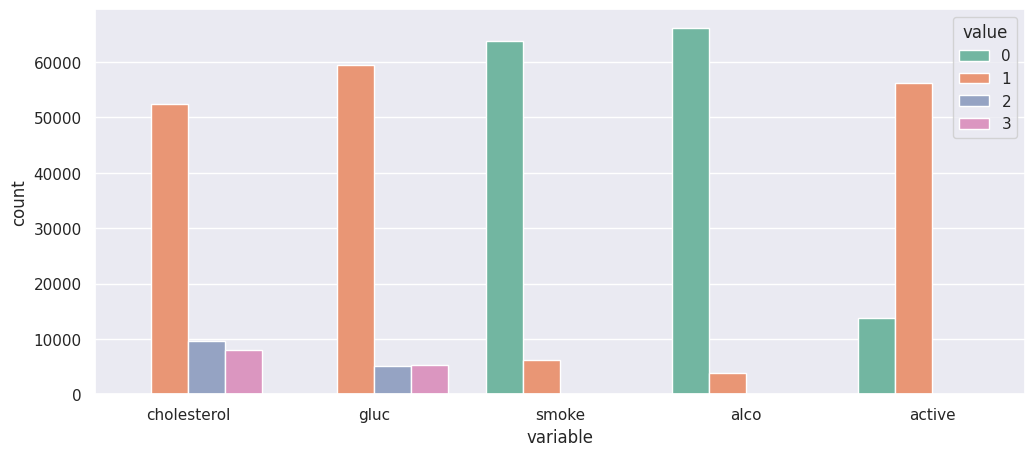

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_categorical = dataset.loc[:,['cholesterol', 'gluc', 'smoke', 'alco', 'active']]

# Set the figure size
plt.figure(figsize=(12, 5))

# Create the count plot
sns.countplot(x="variable", hue="value", data=pd.melt(df_categorical), palette="Set2")

plt.show()


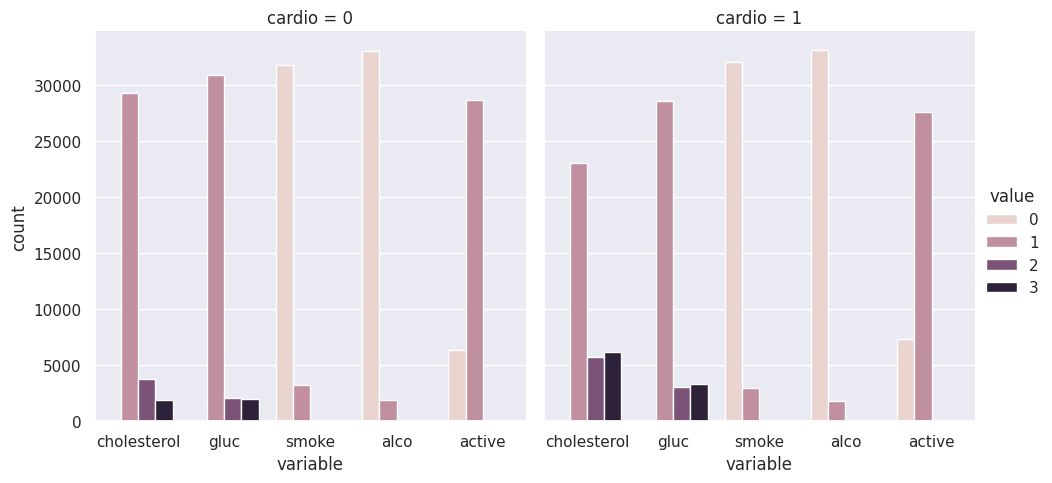

In [120]:
df_long = pd.melt(dataset, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

<Axes: >

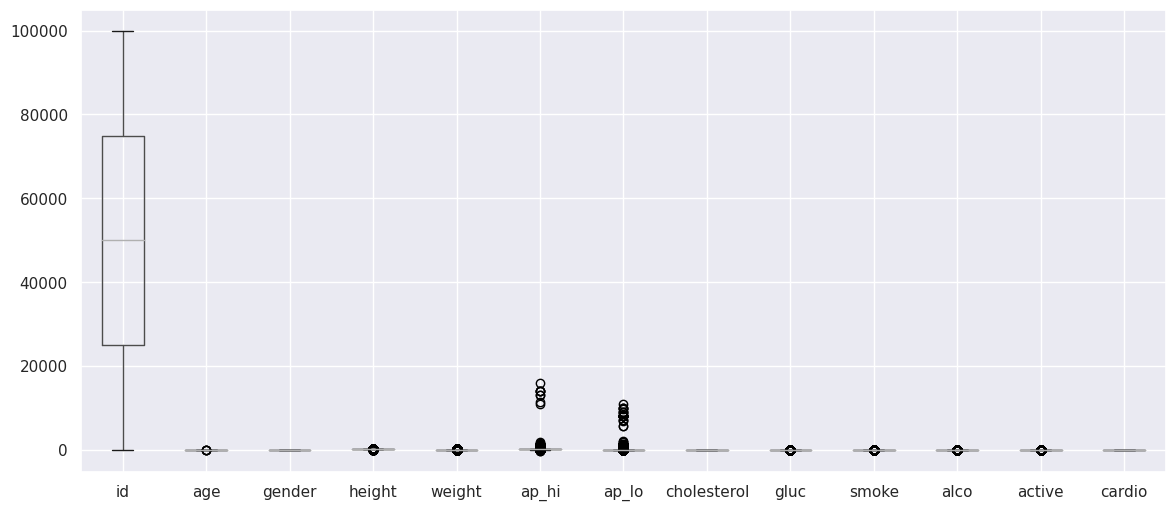

In [121]:
dataset.boxplot(figsize=(14,6))

<Axes: >

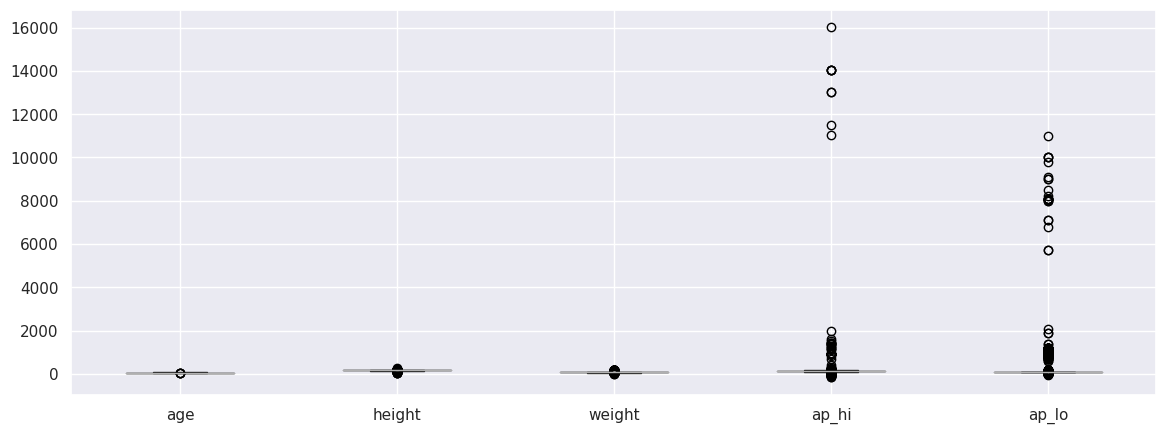

In [122]:
dataset[["age","height","weight","ap_hi","ap_lo"]].boxplot()

##Dataset Preprocessing

In [123]:
#Remove Id
dataset.drop("id",axis=1,inplace=True)

<Axes: >

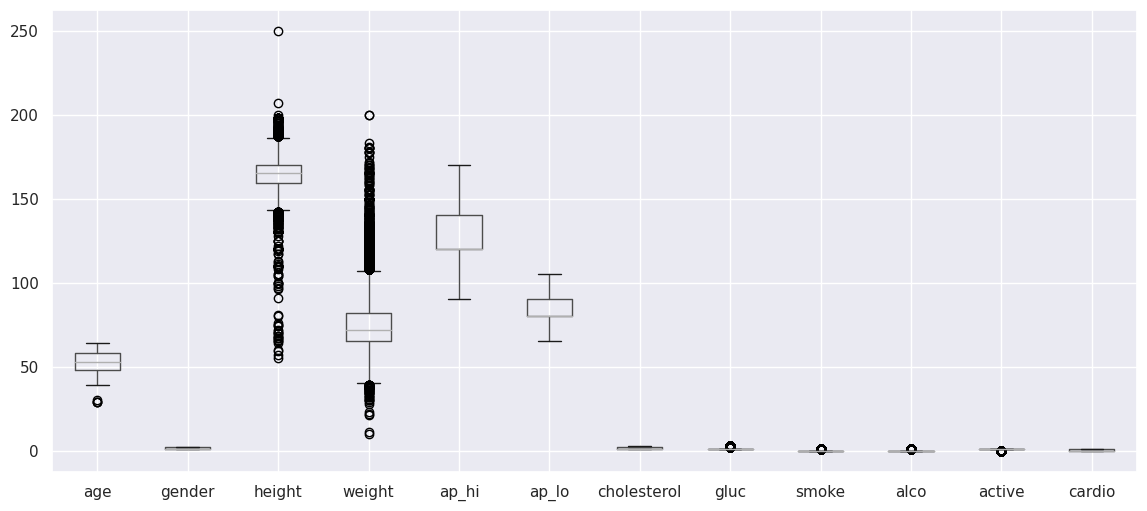

In [124]:
import pandas as pd

# Calculate the IQR for ap_hi and ap_lo
Q1_hi = dataset['ap_hi'].quantile(0.25)
Q3_hi = dataset['ap_hi'].quantile(0.75)
IQR_hi = Q3_hi - Q1_hi

Q1_lo = dataset['ap_lo'].quantile(0.25)
Q3_lo = dataset['ap_lo'].quantile(0.75)
IQR_lo = Q3_lo - Q1_lo

# Define the upper and lower bounds for outliers
upper_bound_hi = Q3_hi + 1.5 * IQR_hi
lower_bound_hi = Q1_hi - 1.5 * IQR_hi

upper_bound_lo = Q3_lo + 1.5 * IQR_lo
lower_bound_lo = Q1_lo - 1.5 * IQR_lo

# Identify and filter out outliers
outliers_hi = (dataset['ap_hi'] > upper_bound_hi) | (dataset['ap_hi'] < lower_bound_hi)
outliers_lo = (dataset['ap_lo'] > upper_bound_lo) | (dataset['ap_lo'] < lower_bound_lo)

# Replace outliers with the median (you can choose a different strategy based on your analysis)
dataset.loc[outliers_hi, 'ap_hi'] = dataset['ap_hi'].median()
dataset.loc[outliers_lo, 'ap_lo'] = dataset['ap_lo'].median()
dataset.boxplot(figsize=(14,6))

<Axes: >

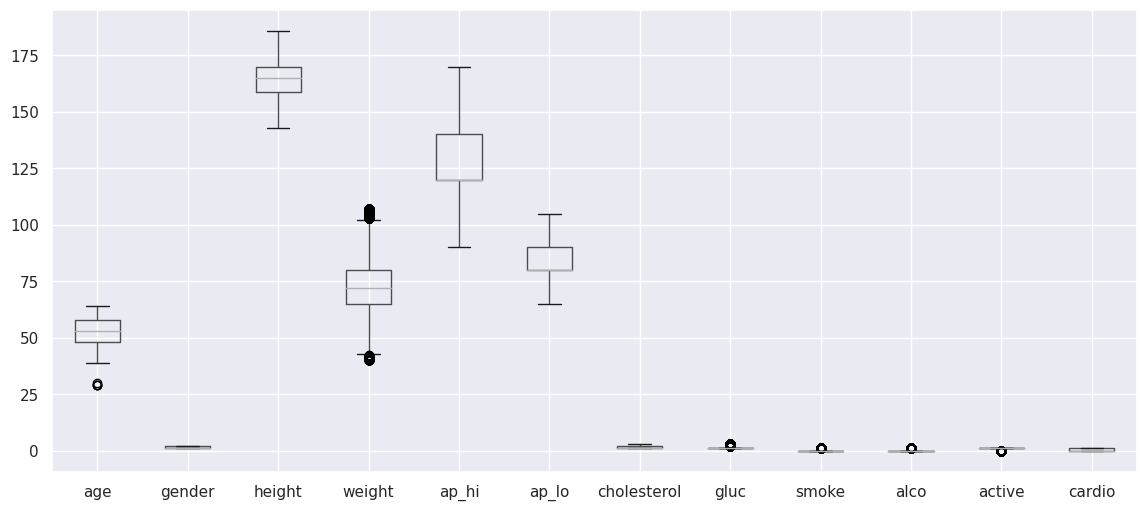

In [125]:
# Calculate the IQR for height, and weight

Q1_height = dataset['height'].quantile(0.25)
Q3_height = dataset['height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

Q1_weight = dataset['weight'].quantile(0.25)
Q3_weight = dataset['weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

upper_bound_height = Q3_height + 1.5 * IQR_height
lower_bound_height = Q1_height - 1.5 * IQR_height

upper_bound_weight = Q3_weight + 1.5 * IQR_weight
lower_bound_weight = Q1_weight - 1.5 * IQR_weight

# Identify and filter out outliers for height, and weight
outliers_height = (dataset['height'] > upper_bound_height) | (dataset['height'] < lower_bound_height)
outliers_weight = (dataset['weight'] > upper_bound_weight) | (dataset['weight'] < lower_bound_weight)

# Replace outliers with the median (you can choose a different strategy based on your analysis)
dataset.loc[outliers_height, 'height'] = dataset['height'].median()
dataset.loc[outliers_weight, 'weight'] = dataset['weight'].median()

dataset.boxplot(figsize=(14,6))

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>],
       [<Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>]], dtype=object)

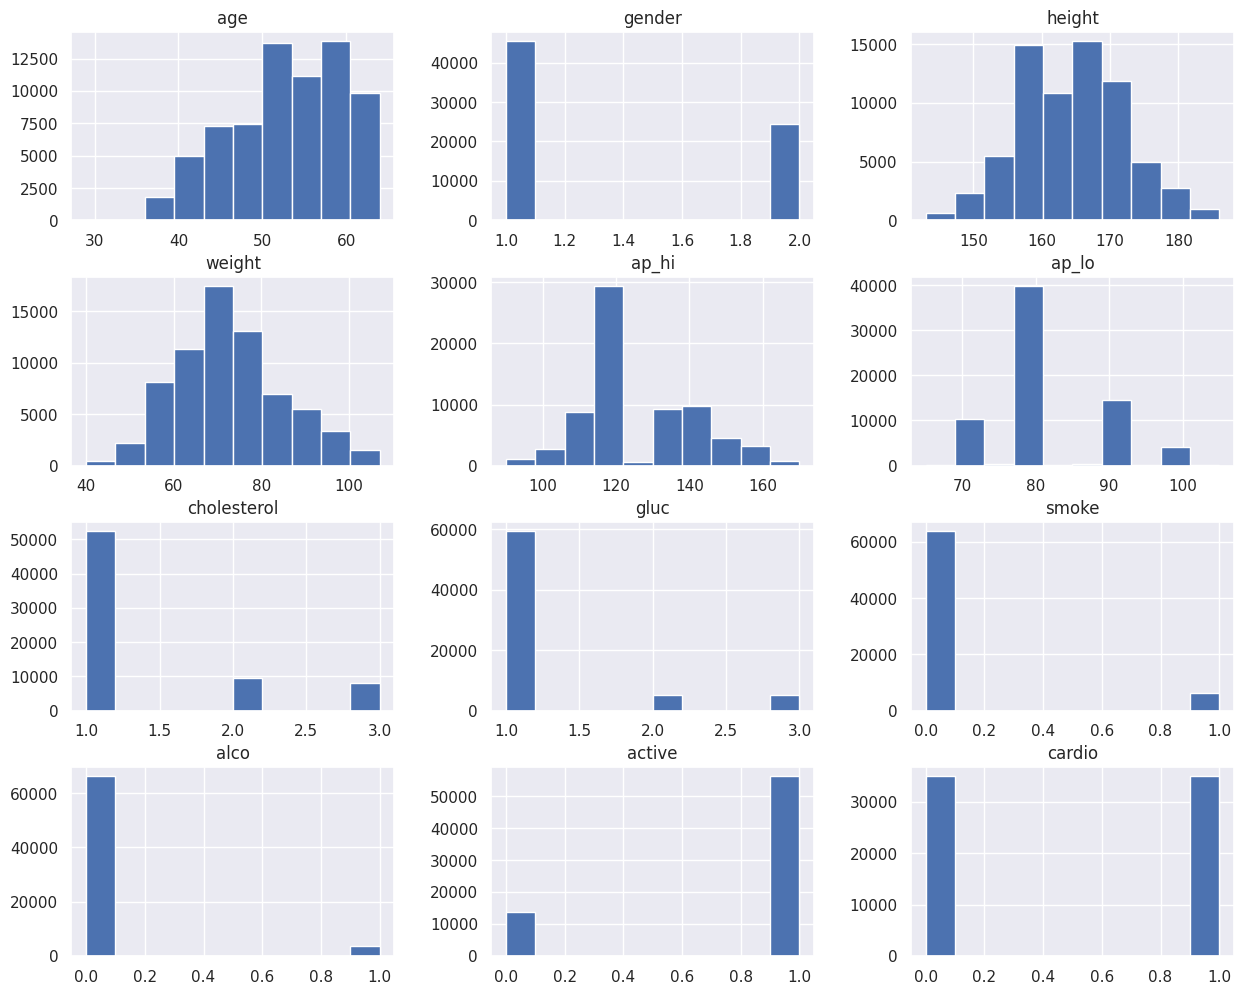

In [126]:
dataset.hist(figsize=(15,12))

<Axes: >

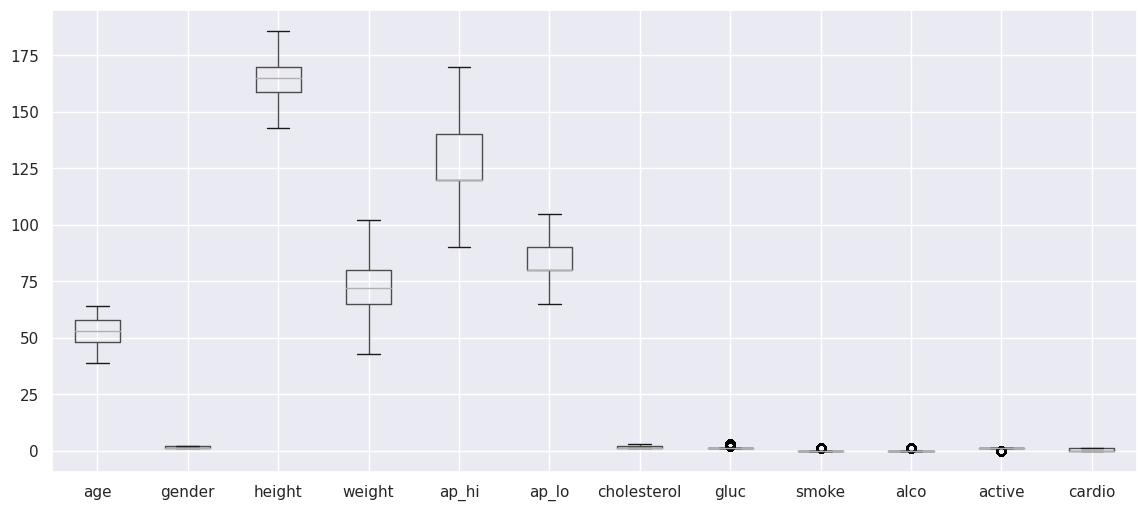

In [127]:
# Calculate the IQR for age, height, and weight
Q1_age = dataset['age'].quantile(0.25)
Q3_age = dataset['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

Q1_weight = dataset['weight'].quantile(0.25)
Q3_weight = dataset['weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

# Define the upper and lower bounds for outliers
upper_bound_age = Q3_age + 1.5 * IQR_age
lower_bound_age = Q1_age - 1.5 * IQR_age

upper_bound_weight = Q3_weight + 1.5 * IQR_weight
lower_bound_weight = Q1_weight - 1.5 * IQR_weight

# Identify and filter out outliers for age and weight
outliers_age = (dataset['age'] > upper_bound_age) | (dataset['age'] < lower_bound_age)
outliers_weight = (dataset['weight'] > upper_bound_weight) | (dataset['weight'] < lower_bound_weight)

# Replace outliers with the median (you can choose a different strategy based on your analysis)
dataset.loc[outliers_age, 'age'] = dataset['age'].median()
dataset.loc[outliers_weight, 'weight'] = dataset['weight'].median()
dataset.boxplot(figsize=(14,6))

In [128]:
dataset["bmi"] = np.round(dataset.weight/(dataset.height/100)**2,2)
print(dataset.shape)
dataset.head(10)

(70000, 13)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,47,1,156,56.0,100,80,1,1,0,0,0,0,23.01
5,60,1,151,67.0,120,80,2,2,0,0,0,0,29.38
6,60,1,157,93.0,130,80,3,1,0,0,1,0,37.73
7,61,2,178,95.0,130,90,3,3,0,0,1,1,29.98
8,48,1,158,71.0,110,70,1,1,0,0,1,0,28.44
9,54,1,164,68.0,110,80,1,1,0,0,0,0,25.28


<Axes: >

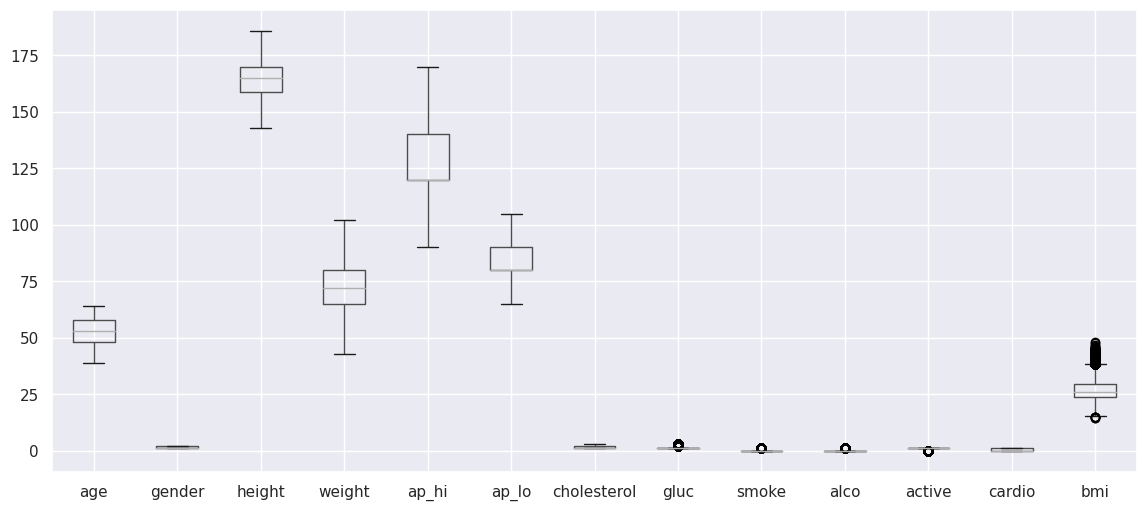

In [129]:
dataset.boxplot(figsize=(14,6))

In [130]:
dataset.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
dtype: int64

In [131]:
#Correlation Matrix
corr=dataset.corr().style.background_gradient(cmap='gray')
corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
age,1.000000,-0.022962,-0.086881,0.066349,0.206189,0.144332,0.153958,0.098343,-0.047727,-0.029814,-0.009903,0.237867,0.117605
gender,-0.022962,1.000000,0.524302,0.159867,0.059886,0.050392,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.147058
height,-0.086881,0.524302,1.000000,0.294060,0.020783,0.015567,-0.056720,-0.021675,0.196219,0.096770,-0.007778,-0.012566,-0.285253
weight,0.066349,0.159867,0.294060,1.000000,0.230339,0.196623,0.119898,0.081877,0.061821,0.060239,-0.012649,0.165734,0.828167
ap_hi,0.206189,0.059886,0.020783,0.230339,1.000000,0.624512,0.189022,0.086501,0.023740,0.029870,0.002405,0.428286,0.219571
ap_lo,0.144332,0.050392,0.015567,0.196623,0.624512,1.000000,0.156604,0.068642,0.021394,0.033166,-0.000906,0.331357,0.188176
cholesterol,0.153958,-0.035821,-0.056720,0.119898,0.189022,0.156604,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.153887
gluc,0.098343,-0.020491,-0.021675,0.081877,0.086501,0.068642,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.095015
smoke,-0.047727,0.338135,0.196219,0.061821,0.023740,0.021394,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.052033
alco,-0.029814,0.170966,0.096770,0.060239,0.029870,0.033166,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,0.003632


In [132]:
dataset['gluc'].unique()

array([1, 2, 3])

<Axes: >

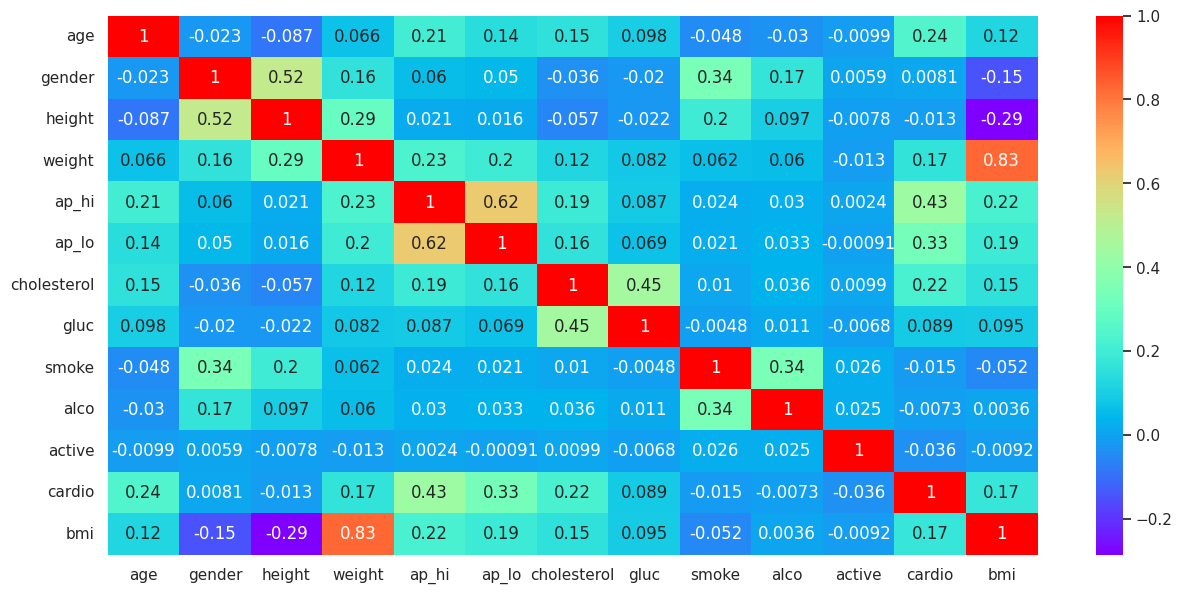

In [133]:
#Let's visualize the correlation matrix iin the seaborn
sns.set(rc={'figure.figsize':(15,7)})
sns.heatmap(dataset.corr(),annot=True,cmap='rainbow')

In [134]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assuming 'dataset' is your cardiovascular disease dataset DataFrame
# Separate features (x) and target variable (y)
xx = dataset.drop('gender', axis=1)
yy = dataset['gender']

# Determine the desired number of samples for each class in the 'gender' column
desired_samples = yy.value_counts().max()  # Adjust this as needed

# Define the sampling strategy for RandomOverSampler
sampling_strategy = {1: desired_samples, 2: desired_samples}

# Apply random oversampling to the entire dataset for the 'gender' column
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = ros.fit_resample(xx, yy)

# Combine the resampled data back into a DataFrame
dataset = pd.concat([pd.DataFrame(X_resampled, columns=xx.columns), pd.DataFrame(y_resampled, columns=['gender'])], axis=1)

# Display the resampled 'gender' column counts
print(dataset['gender'].value_counts())

gender
2    45530
1    45530
Name: count, dtype: int64


<Axes: >

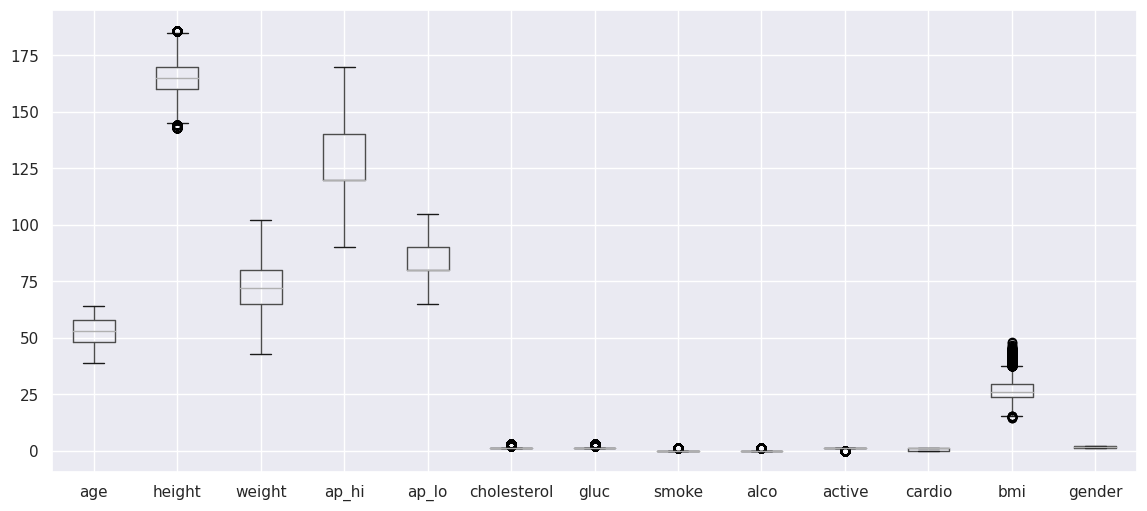

In [135]:
dataset.boxplot(figsize=(14,6))

In [136]:
dataset = dataset[['age', 'gender', 'height', 'weight', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]

##Split the dataset

In [137]:
x=dataset.drop('cardio',axis=1)
y=dataset['cardio']
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.2,random_state=42)

In [138]:
x_train

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
13724,58,1,157,62.0,25.15,120,80,1,1,0,0,1
914,48,1,164,80.0,29.74,140,90,2,1,0,0,1
90135,55,2,181,79.0,24.11,120,80,1,1,0,0,1
53477,52,1,158,84.0,33.65,150,90,1,1,0,0,1
21648,50,1,161,63.0,24.30,110,70,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,63,2,162,73.0,27.82,160,90,1,1,0,0,1
54886,64,1,169,74.0,25.91,120,80,1,1,0,0,1
76820,44,2,167,85.0,30.48,120,80,1,1,0,0,1
860,49,1,167,70.0,25.10,120,80,1,1,0,0,0


In [139]:
y_train

13724    0
914      1
90135    1
53477    1
21648    0
        ..
6265     1
54886    0
76820    0
860      0
15795    0
Name: cardio, Length: 72848, dtype: int64

In [140]:
x_test=pd.DataFrame(x_test, columns=x.columns)
print(x_test.head(50))

       age  gender  height  weight    bmi  ap_hi  ap_lo  cholesterol  gluc  \
76950   41       2     178    68.0  21.46    120     70            1     1   
17904   39       1     152    68.0  29.43    120     80            1     1   
59307   60       2     175    72.0  23.51    130     90            1     1   
13094   52       2     160    65.0  25.39    120     80            1     1   
58164   53       1     164   102.0  37.92    100     80            1     1   
42402   57       1     170    80.0  27.68    127     69            1     1   
41292   45       2     161    64.0  24.69    140     80            1     1   
20619   43       1     166    57.0  20.69    120     80            1     1   
51143   41       1     161    53.0  20.45    120     80            2     1   
5510    50       2     185    79.0  23.08    110     70            1     1   
55843   52       1     163    80.0  30.11    120     80            1     1   
31220   60       2     170    81.0  28.03    120     80         

In [141]:
print(y_test.head(50))

76950    0
17904    0
59307    1
13094    0
58164    0
42402    0
41292    1
20619    0
51143    1
5510     0
55843    0
31220    1
70234    1
71670    1
67022    1
24032    1
66209    0
24840    0
55629    1
22775    1
16787    1
6016     1
36597    1
58672    0
70611    1
73961    1
54395    1
12883    1
81429    1
33448    1
20683    1
39285    1
35621    0
70301    1
10717    0
27697    0
8619     1
2540     1
25845    1
70437    1
11668    0
4116     1
51509    1
24768    0
17080    1
4155     1
60507    1
62171    0
9423     0
9732     1
Name: cardio, dtype: int64


In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##Model Training and prediction

###Model 1 - Decision tree

In [143]:
#Train decision tree
dcl=DecisionTreeClassifier()
dcl.fit(x_train,y_train)

DecisionTreeClassifier()

In [144]:
#Train accuracy
train_predict = dcl.predict(x_train)
dcl_train_accura = accuracy_score(y_train,train_predict)


print(f"Train Accuracy:{dcl_train_accura:.2f}")

Train Accuracy:0.98


In [145]:
#Test accuracy
predict=dcl.predict(x_test)
DecisionTree_accuracy=accuracy_score(y_test,predict)
cm1=confusion_matrix(y_test,predict)
print(f"Test Accuracy:{DecisionTree_accuracy:.2f}")
print("\nDecision Tree Classification Report:\n", classification_report(y_test, predict))
print("Confusion Matxir",cm1)

Test Accuracy:0.75

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      9041
           1       0.75      0.75      0.75      9171

    accuracy                           0.75     18212
   macro avg       0.75      0.75      0.75     18212
weighted avg       0.75      0.75      0.75     18212

Confusion Matxir [[6782 2259]
 [2280 6891]]


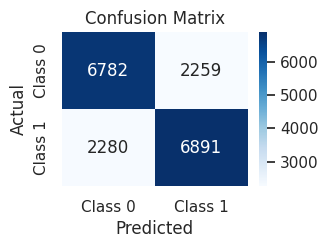

In [146]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predict)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [147]:
# # Assuming you have a trained Decision Tree model (dcl)

# # Get user input for features
# age = float(input("Enter age: "))
# gender = int(input("Enter gender (1 for male, 2 for female): "))
# height = int(input("Enter height in cm: "))
# weight = float(input("Enter weight in kg: "))
# bmi = float(input("Enter BMI: "))
# ap_hi = int(input("Enter systolic blood pressure (ap_hi): "))
# ap_lo = int(input("Enter diastolic blood pressure (ap_lo): "))
# cholesterol = int(input("Enter cholesterol level: "))
# gluc = int(input("Enter glucose level: "))
# smoke = int(input("Enter smoking status (0 for non-smoker, 1 for smoker): "))
# alco = int(input("Enter alcohol consumption status (0 for non-drinker, 1 for drinker): "))
# active = int(input("Enter physical activity status (0 for inactive, 1 for active): "))

# # Create a DataFrame with user input
# new_data = pd.DataFrame({
#     'age': [age],
#     'gender': [gender],
#     'height': [height],
#     'weight': [weight],
#     'bmi': [bmi],
#     'ap_hi': [ap_hi],
#     'ap_lo': [ap_lo],
#     'cholesterol': [cholesterol],
#     'gluc': [gluc],
#     'smoke': [smoke],
#     'alco': [alco],
#     'active': [active]
# })

# new_data_scaled = scaler.transform(new_data)
# # Make predictions using the Decision Tree model (dcl)
# predictions = dcl.predict(new_data_scaled)

# # Display the predictions
# print("Predictions:", predictions[0])

###Improve the accuracy-Hyper paramaeter tuning using grid search

In [150]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib

# Train the initial decision tree model
dcl = DecisionTreeClassifier()
dcl.fit(x_train, y_train)

# Evaluate initial model
train_predict = dcl.predict(x_train)
dcl_train_accuracy = accuracy_score(y_train, train_predict)
predict = dcl.predict(x_test)
DecisionTree_accuracy = accuracy_score(y_test, predict)

print(f"Initial Train Accuracy: {dcl_train_accuracy:.2f}")
print(f"Initial Test Accuracy: {DecisionTree_accuracy:.2f}")
print("\nInitial Decision Tree Classification Report:\n", classification_report(y_test, predict))

# Define the parameter grid to search
param_grid_dcl = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']  # Set to 'sqrt' to resolve deprecation warning
}

# Perform Grid Search
grid_search_dcl = GridSearchCV(DecisionTreeClassifier(), param_grid_dcl, cv=5, scoring='accuracy')
grid_search_dcl.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params_dcl = grid_search_dcl.best_params_
best_estimator_dcl = grid_search_dcl.best_estimator_

# Use the best estimator for prediction
predictions = best_estimator_dcl.predict(x_test)
DecisionTreeModel_accuracy = accuracy_score(y_test, predictions)

print("\nBest Parameters:", best_params_dcl)
print("Test Accuracy after Grid Search:", DecisionTreeModel_accuracy)
cm=confusion_matrix(y_test,predictions)
print("Confusion matrix",cm)

# # Save the best model
# # joblib.dump(best_estimator, 'best_decision_tree_model.pkl')
# # print("Best model saved successfully!")

Initial Train Accuracy: 0.98
Initial Test Accuracy: 0.75

Initial Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      9041
           1       0.75      0.75      0.75      9171

    accuracy                           0.75     18212
   macro avg       0.75      0.75      0.75     18212
weighted avg       0.75      0.75      0.75     18212


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy after Grid Search: 0.7545574346584669
Confusion matrix [[6856 2185]
 [2285 6886]]


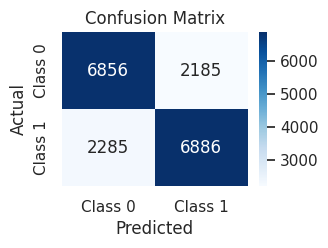

In [151]:
# Calculate the confusion matrix
cm=confusion_matrix(y_test,predictions)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [152]:
print("\nInitial Decision Tree Classification Report:\n", classification_report(y_test, predictions))


Initial Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      9041
           1       0.76      0.75      0.75      9171

    accuracy                           0.75     18212
   macro avg       0.75      0.75      0.75     18212
weighted avg       0.75      0.75      0.75     18212



In [153]:
# Access feature importances from the best_estimator
feature_importances = best_estimator_dcl.feature_importances_

# Create a DataFrame to display feature importanc_dcles
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)


        Feature  Importance
5         ap_hi    0.231325
4           bmi    0.188525
0           age    0.164437
2        height    0.134800
3        weight    0.130723
6         ap_lo    0.045571
7   cholesterol    0.026216
1        gender    0.022186
8          gluc    0.018382
9         smoke    0.014639
11       active    0.013605
10         alco    0.009592


####Decision Tree from scratch

In [154]:
import numpy as np

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_samples_per_class = [np.sum(y == c) for c in np.unique(y)]
        predicted_class = np.argmax(num_samples_per_class)

        # Stopping criteria
        if (depth == self.max_depth) or (len(np.unique(y)) == 1):
            return {'class': predicted_class, 'num_samples': num_samples}

        # Find best split
        best_gini = float('inf')
        best_feature = None
        best_threshold = None
        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold

                left_gini = self._gini(y[left_indices])
                right_gini = self._gini(y[right_indices])

                gini = (left_gini * np.sum(left_indices) + right_gini * np.sum(right_indices)) / num_samples
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left_subtree, 'right': right_subtree}

    def _gini(self, y):
        num_samples = len(y)
        _, counts = np.unique(y, return_counts=True)
        probs = counts / num_samples
        return 1 - np.sum(probs ** 2)

    def predict(self, X):
        return [self._predict_tree(x, self.tree) for x in X]

    def _predict_tree(self, x, tree):
        if 'class' in tree:
            return tree['class']
        if x[tree['feature']] <= tree['threshold']:
            return self._predict_tree(x, tree['left'])
        else:
            return self._predict_tree(x, tree['right'])

# Example usage:
# Instantiate and train the decision tree classifier
dcl_scratch = DecisionTreeClassifier(max_depth=5)
dcl_scratch .fit(x_train, y_train)

# Make predictions on the test set
predictions = dcl_scratch .predict(x_test)

# Evaluate the model
dcl_scratch_accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Test Accuracy:", dcl_scratch_accuracy)
print("Confusion matrix:", conf_matrix)

Test Accuracy: 0.7258950142763013
Confusion matrix: [[6782 2259]
 [2733 6438]]


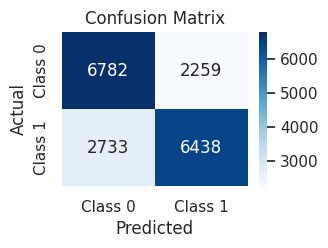

In [155]:
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [156]:
print("\nDecision Tree from scratch Classification Report:\n", classification_report(y_test, predictions))


Decision Tree from scratch Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73      9041
           1       0.74      0.70      0.72      9171

    accuracy                           0.73     18212
   macro avg       0.73      0.73      0.73     18212
weighted avg       0.73      0.73      0.73     18212



###User Data

In [91]:
# # Assuming you have a trained Decision Tree model (dcl)

# # Get user input for features
# age = float(input("Enter age: "))
# gender = int(input("Enter gender (1 for male, 2 for female): "))
# height = int(input("Enter height in cm: "))
# weight = float(input("Enter weight in kg: "))
# bmi = float(input("Enter BMI: "))
# ap_hi = int(input("Enter systolic blood pressure (ap_hi): "))
# ap_lo = int(input("Enter diastolic blood pressure (ap_lo): "))
# cholesterol = int(input("Enter cholesterol level: "))
# gluc = int(input("Enter glucose level: "))
# smoke = int(input("Enter smoking status (0 for non-smoker, 1 for smoker): "))
# alco = int(input("Enter alcohol consumption status (0 for non-drinker, 1 for drinker): "))
# active = int(input("Enter physical activity status (0 for inactive, 1 for active): "))

# # Create a DataFrame with user input
# new_data_dcl = pd.DataFrame({
#     'age': [age],
#     'gender': [gender],
#     'height': [height],
#     'weight': [weight],
#     'bmi': [bmi],
#     'ap_hi': [ap_hi],
#     'ap_lo': [ap_lo],
#     'cholesterol': [cholesterol],
#     'gluc': [gluc],
#     'smoke': [smoke],
#     'alco': [alco],
#     'active': [active]
# })

# new_data_scaled_dcl = scaler.transform(new_data_dcl)
# # Make predictions using the Decision Tree model (dcl)
# predictions = best_estimator_dcl.predict(new_data_scaled_dcl)

# # Display the predictions
# print("Predictions:", predictions[0])

In [ ]:
# import pickle

# # Assuming dt_scratch is your trained decision tree model

# # Save the model to a file
# with open('decisionTree_pretrained25-03-24Scaler.pkl', 'wb') as file:
#     pickle.dump(scaler, file)

In [92]:
# import pickle

# # Assuming dt_scratch is your trained decision tree model

# # Save the model to a file
# with open('decisionTree_pretrained25-03-24.pkl', 'wb') as file:
#     pickle.dump(best_estimator, file)

In [93]:
# from sklearn.ensemble import RandomForestClassifier

# rf=RandomForestClassifier()
# rf.fit(x_train,y_train)
# pred=rf.predict(x_test)
# accu=accuracy_score(y_test,pred)
# print("Accuracy",accu)

In [94]:
# # Access feature importances from the best_estimator
# feature_importances = rf.feature_importances_

# # Create a DataFrame to display feature importances
# importance_df = pd.DataFrame({
#     'Feature': x.columns,
#     'Importance': feature_importances
# })

# # Sort the DataFrame by importance score in descending order
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Display the feature importances
# print(importance_df)

###Model 2 - KNN

In [157]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [158]:
#Train accuracy
train_predict = knn_model.predict(x_train)
knn_train_accura = accuracy_score(y_train,train_predict)


print(f"Train Accuracy:{knn_train_accura:.2f}")

Train Accuracy:0.81


In [159]:
#Test accuracy
predict=knn_model.predict(x_test)
knn_accuracy=accuracy_score(y_test,predict)
cm1=confusion_matrix(y_test,predict)


print(f"Test Accuracy:{knn_accuracy:.2f}")
print("\nKNN Classification Report:\n", classification_report(y_test, predict))
print("Confusion Matxir",cm1)

Test Accuracy:0.72

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.72      9041
           1       0.73      0.72      0.72      9171

    accuracy                           0.72     18212
   macro avg       0.72      0.72      0.72     18212
weighted avg       0.72      0.72      0.72     18212

Confusion Matxir [[6559 2482]
 [2572 6599]]


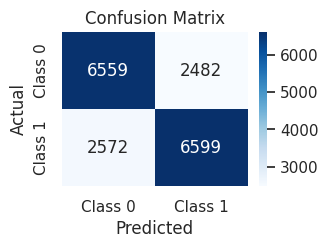

In [160]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predict)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# # Assuming you have a trained Decision Tree model (dcl)

# # Get user input for features
# age = float(input("Enter age: "))
# gender = int(input("Enter gender (1 for male, 2 for female): "))
# height = int(input("Enter height in cm: "))
# weight = float(input("Enter weight in kg: "))
# bmi = float(input("Enter BMI: "))
# ap_hi = int(input("Enter systolic blood pressure (ap_hi): "))
# ap_lo = int(input("Enter diastolic blood pressure (ap_lo): "))
# cholesterol = int(input("Enter cholesterol level: "))
# gluc = int(input("Enter glucose level: "))
# smoke = int(input("Enter smoking status (0 for non-smoker, 1 for smoker): "))
# alco = int(input("Enter alcohol consumption status (0 for non-drinker, 1 for drinker): "))
# active = int(input("Enter physical activity status (0 for inactive, 1 for active): "))

# # Create a DataFrame with user input
# new_data_knn = pd.DataFrame({
#     'age': [age],
#     'gender': [gender],
#     'height': [height],
#     'weight': [weight],
#     'bmi': [bmi],
#     'ap_hi': [ap_hi],
#     'ap_lo': [ap_lo],
#     'cholesterol': [cholesterol],
#     'gluc': [gluc],
#     'smoke': [smoke],
#     'alco': [alco],
#     'active': [active]
# })

# new_data_scaled_knn = scaler.transform(new_data_knn)
# # Make predictions using the Decision Tree model (dcl)
# predictions_knn = knn_model.predict(new_data_scaled_knn)

# # Display the predictions
# print("Predictions:", predictions_knn[0])

In [ ]:
# import pickle

# # Assuming dt_scratch is your trained decision tree model

# # Save the model to a file
# with open('knn_pretrained25-03-24Scaler.pkl', 'wb') as file:
#     pickle.dump(scaler, file)

In [ ]:
# import pickle

# # Assuming dt_scratch is your trained decision tree model

# # Save the model to a file
# with open('KNN_pretrained_newupdate25-03-24.pkl', 'wb') as file:
#     pickle.dump(knn_model, file)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# # Define the parameter grid for GridSearchCV
# param_grid_knn = {
#     'n_neighbors': [3, 5, 7, 9],  # Adjust values as needed
#     'weights': ['uniform', 'distance'],  # Try different weight options
#     'metric': ['euclidean', 'manhattan']  # Try different distance metrics
# }

# # Create the KNN classifier
# knn = KNeighborsClassifier()

# # Initialize GridSearchCV
# grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')

# # Fit GridSearchCV to the training data
# grid_search_knn.fit(x_train, y_train)

# # Get the best parameters and best estimator from GridSearchCV
# best_params_knn = grid_search_knn.best_params_
# best_estimator_knn = grid_search_knn.best_estimator_

# # Use the best estimator for prediction
# predictions_train_knn = best_estimator_knn.predict(x_train)
# predictions_test_knn = best_estimator_knn.predict(x_test)

# # Calculate accuracy scores
# train_accuracy = accuracy_score(y_train, predictions_train_knn)
# test_accuracy = accuracy_score(y_test, predictions_test_knn)

# # Calculate confusion matrix
# cm_train = confusion_matrix(y_train, predictions_train_knn)
# cm_test = confusion_matrix(y_test, predictions_test_knn)

# # Print results
# print("Best Parameters:", best_params_knn)
# print("Train Accuracy:", train_accuracy)
# print("Test Accuracy:", test_accuracy)
# print("\nTrain Confusion Matrix:\n", cm_train)
# print("\nTest Confusion Matrix:\n", cm_test)


In [ ]:
# # Assuming you have a trained Decision Tree model (dcl)

# # Get user input for features
# age = float(input("Enter age: "))
# gender = int(input("Enter gender (1 for male, 2 for female): "))
# height = int(input("Enter height in cm: "))
# weight = float(input("Enter weight in kg: "))
# bmi = float(input("Enter BMI: "))
# ap_hi = int(input("Enter systolic blood pressure (ap_hi): "))
# ap_lo = int(input("Enter diastolic blood pressure (ap_lo): "))
# cholesterol = int(input("Enter cholesterol level: "))
# gluc = int(input("Enter glucose level: "))
# smoke = int(input("Enter smoking status (0 for non-smoker, 1 for smoker): "))
# alco = int(input("Enter alcohol consumption status (0 for non-drinker, 1 for drinker): "))
# active = int(input("Enter physical activity status (0 for inactive, 1 for active): "))

# # Create a DataFrame with user input
# new_data_knn = pd.DataFrame({
#     'age': [age],
#     'gender': [gender],
#     'height': [height],
#     'weight': [weight],
#     'bmi': [bmi],
#     'ap_hi': [ap_hi],
#     'ap_lo': [ap_lo],
#     'cholesterol': [cholesterol],
#     'gluc': [gluc],
#     'smoke': [smoke],
#     'alco': [alco],
#     'active': [active]
# })

# new_data_scaled_knn = scaler.transform(new_data_knn)
# # Make predictions using the Decision Tree model (dcl)
# predictions_knn = best_estimator_knn.predict(new_data_scaled_knn)

# # Display the predictions
# print("Predictions:", predictions_knn[0])

In [ ]:
# import pickle

# # Assuming dt_scratch is your trained decision tree model

# # Save the model to a file
# with open('KNN_pretrained25-03-24.pkl', 'wb') as file:
#     pickle.dump(knn, file)

In [ ]:
# #Feature Importance
# from sklearn.inspection import permutation_importance

# # Assuming you have a trained KNN model named knn_model
# # Perform permutation feature importance
# result = permutation_importance(knn, x_test, y_test, n_repeats=10, random_state=42)

# # Get feature importances
# importance_df = pd.DataFrame({
#     'Feature': x.columns,
#     'Importance': result.importances_mean
# })

# # Sort the DataFrame by importance score in descending order
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Display the feature importances
# print(importance_df)



###Model 3 - Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [162]:
#Train accuracy
train_predict = lr.predict(x_train)
lr_train_accura = accuracy_score(y_train,train_predict)


print(f"Train Accuracy:{lr_train_accura:.2f}")

Train Accuracy:0.72


In [163]:
#Test accuracy
predict=lr.predict(x_test)
lr_accuracy=accuracy_score(y_test,predict)
cm1=confusion_matrix(y_test,predict)


print(f"Test Accuracy:{lr_accuracy:.2f}")
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, predict))
print("Confusion Matxir",cm1)

Test Accuracy:0.73

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      9041
           1       0.76      0.68      0.71      9171

    accuracy                           0.73     18212
   macro avg       0.73      0.73      0.73     18212
weighted avg       0.73      0.73      0.73     18212

Confusion Matxir [[7031 2010]
 [2960 6211]]


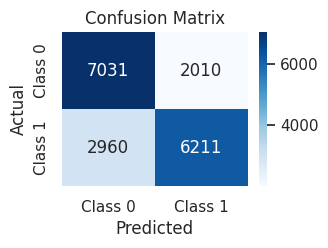

In [164]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predict)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# import pickle

# # Assuming dt_scratch is your trained decision tree model

# # Save the model to a file
# with open('logreg_pretrained25-03-24Scaler.pkl', 'wb') as file:
#     pickle.dump(scaler, file)

In [ ]:
# import pickle

# # Assuming dt_scratch is your trained decision tree model

# # Save the model to a file
# with open('logreg_pretrained_new25-03-24.pkl', 'wb') as file:
#     pickle.dump(lr, file)

In [ ]:
# # Assuming you have a trained Decision Tree model (dcl)

# # Get user input for features
# age = float(input("Enter age: "))
# gender = int(input("Enter gender (1 for male, 2 for female): "))
# height = int(input("Enter height in cm: "))
# weight = float(input("Enter weight in kg: "))
# bmi = float(input("Enter BMI: "))
# ap_hi = int(input("Enter systolic blood pressure (ap_hi): "))
# ap_lo = int(input("Enter diastolic blood pressure (ap_lo): "))
# cholesterol = int(input("Enter cholesterol level: "))
# gluc = int(input("Enter glucose level: "))
# smoke = int(input("Enter smoking status (0 for non-smoker, 1 for smoker): "))
# alco = int(input("Enter alcohol consumption status (0 for non-drinker, 1 for drinker): "))
# active = int(input("Enter physical activity status (0 for inactive, 1 for active): "))

# # Create a DataFrame with user input
# new_data_lr = pd.DataFrame({
#     'age': [age],
#     'gender': [gender],
#     'height': [height],
#     'weight': [weight],
#     'bmi': [bmi],
#     'ap_hi': [ap_hi],
#     'ap_lo': [ap_lo],
#     'cholesterol': [cholesterol],
#     'gluc': [gluc],
#     'smoke': [smoke],
#     'alco': [alco],
#     'active': [active]
# })

# new_data_scaled_lr = scaler.transform(new_data_lr)
# # Make predictions using the Decision Tree model (dcl)
# predictions_lr = lr.predict(new_data_scaled_lr)

# # Display the predictions
# print("Predictions:", predictions_lr[0])

In [ ]:
# #Feature Importance
# # Access coefficients from the best_estimator (assuming logreg is your logistic regression model)
# coefficients = lr.coef_[0]

# # Create a DataFrame to display feature importances
# importance_df = pd.DataFrame({
#     'Feature': x.columns,
#     'Coefficient': coefficients
# })

# # Sort the DataFrame by coefficient magnitude
# importance_df['Absolute Coefficient'] = np.abs(importance_df['Coefficient'])
# importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# # Display the feature importances
# print(importance_df)


In [ ]:
# from sklearn.metrics import accuracy_score, confusion_matrix

# # Define the grid of hyperparameters to search
# param_grid_lr = {
#     'penalty': ['l1', 'l2'],                # Regularization penalty
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],    # Inverse of regularization strength
#     'solver': ['liblinear', 'saga'],        # Solver for optimization problem
#     'max_iter': [100, 200, 300]             # Maximum number of iterations
# }

# # Create a grid search object
# grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')

# # Perform grid search on the training data
# grid_search_lr.fit(x_train, y_train)

# # Get the best hyperparameters and best estimator
# best_params_lr = grid_search_lr.best_params_
# best_estimator_lr = grid_search_lr.best_estimator_

# # Use the best estimator for prediction
# predictions_lr = best_estimator_lr.predict(x_test)

# # Evaluate the model
# test_accuracy = accuracy_score(y_test, predictions_lr)
# train_accuracy = accuracy_score(y_train, best_estimator_lr.predict(x_train))
# conf_matrix = confusion_matrix(y_test, predictions_lr)

# # Display results
# print("Best Parameters:", best_params_lr)
# print("Train Accuracy after Grid Search:", train_accuracy)
# print("Test Accuracy after Grid Search:", test_accuracy)
# print("\nConfusion Matrix:")
# print(conf_matrix)


In [ ]:
# # Assuming you have a trained Decision Tree model (dcl)

# # Get user input for features
# age = float(input("Enter age: "))
# gender = int(input("Enter gender (1 for male, 2 for female): "))
# height = int(input("Enter height in cm: "))
# weight = float(input("Enter weight in kg: "))
# bmi = float(input("Enter BMI: "))
# ap_hi = int(input("Enter systolic blood pressure (ap_hi): "))
# ap_lo = int(input("Enter diastolic blood pressure (ap_lo): "))
# cholesterol = int(input("Enter cholesterol level: "))
# gluc = int(input("Enter glucose level: "))
# smoke = int(input("Enter smoking status (0 for non-smoker, 1 for smoker): "))
# alco = int(input("Enter alcohol consumption status (0 for non-drinker, 1 for drinker): "))
# active = int(input("Enter physical activity status (0 for inactive, 1 for active): "))

# # Create a DataFrame with user input
# new_data_lr = pd.DataFrame({
#     'age': [age],
#     'gender': [gender],
#     'height': [height],
#     'weight': [weight],
#     'bmi': [bmi],
#     'ap_hi': [ap_hi],
#     'ap_lo': [ap_lo],
#     'cholesterol': [cholesterol],
#     'gluc': [gluc],
#     'smoke': [smoke],
#     'alco': [alco],
#     'active': [active]
# })

# new_data_scaled_lr = scaler.transform(new_data_lr)
# # Make predictions using the Decision Tree model (dcl)
# predictions_lr = best_estimator_lr.predict(new_data_scaled_lr)

# # Display the predictions
# print("Predictions:", predictions_lr[0])

In [ ]:
# import pickle

# # Assuming dt_scratch is your trained decision tree model

# # Save the model to a file
# with open('Logistc_Regression_pretrained25-03-24.pkl', 'wb') as file:
#     pickle.dump(lr, file)

##Save Model

In [ ]:
# import pickle

# # Assuming dt_scratch is your trained decision tree model

# # Save the model to a file
# with open('logistic_regressionNew2103.pkl', 'wb') as file:
#     pickle.dump(logreg, file)

#Accuracy Comparison of 3 Model and scratch

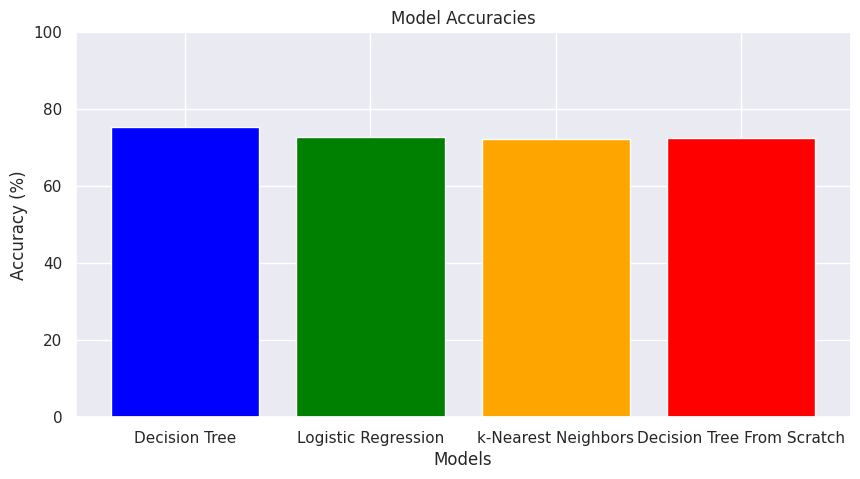

In [165]:
# Convert accuracies to percentage
dcl_accuracy_percentage = DecisionTreeModel_accuracy * 100
logreg_accuracy_percentage = lr_accuracy * 100
knn_accuracy_percentage = knn_accuracy * 100
decl_scratch_accu_percent = dcl_scratch_accuracy * 100

# Create a bar chart
models = ['Decision Tree', 'Logistic Regression', 'k-Nearest Neighbors', 'Decision Tree From Scratch']
accuracies = [dcl_accuracy_percentage, logreg_accuracy_percentage, knn_accuracy_percentage, decl_scratch_accu_percent]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100 for percentage
plt.show()

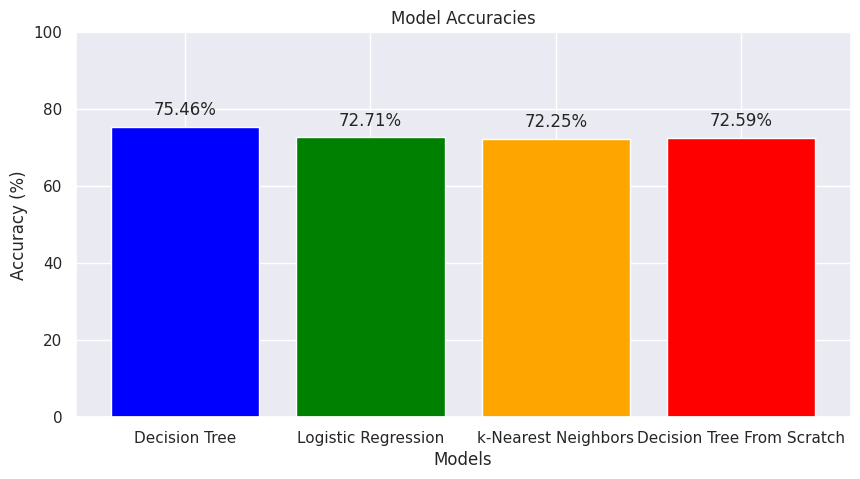

In [166]:
# Create a bar chart
models = ['Decision Tree', 'Logistic Regression', 'k-Nearest Neighbors', 'Decision Tree From Scratch']
accuracies = [dcl_accuracy_percentage, logreg_accuracy_percentage, knn_accuracy_percentage, decl_scratch_accu_percent]

plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100 for percentage

# Add accuracy values above the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.show()
